# Importing the tensorflow library and the `fashion_mnist` dataset

We load the data into `train_data`, `train_labels` , `test_data` , `test_labels`

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


We check the shapes of the data loaded to see if there is any missing values

In [ ]:
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We create an array of the classes of the clothes that are availiable.

In [ ]:
class_names = ['Tshirt' , 'trouser', 'Pullover', 'Dress' ,'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle Boot']
len(class_names)

10

# Visualising the data

We create a loop and plot 4 images randomly and assign the `class_names` against the `train_labels` to visualse the data that we are dealing.

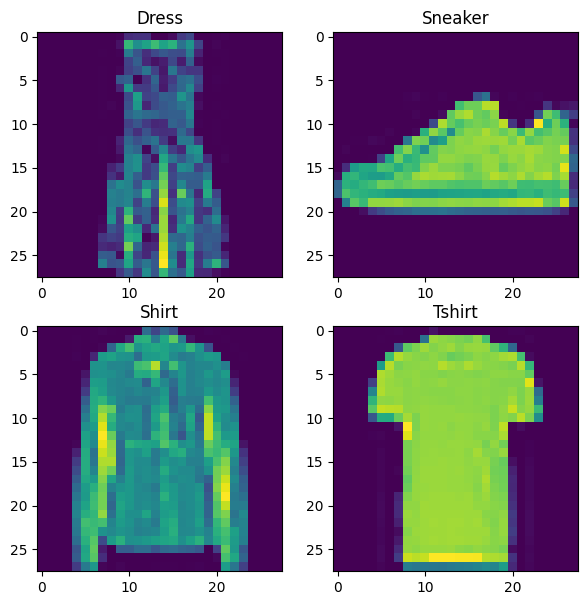

In [ ]:
# Random images
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])


# Preprocessing the data

We use `train_data_min()` and `train_data.max()` to return the minimum and the maximum pixel values of a given image.

In [ ]:
train_data.min() , train_data.max()

(0, 255)

We observe that the maximum value of an image is 255. , so we normalise each image by diving each pixel value by `255` to get the value between 0 and 1.

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data/255.
test_data = test_data/255.

# Check the min and max values of the training data
train_data.min() , train_data.max()

(0.0, 1.0)

# Creating the model

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu') ,
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'softmax')])

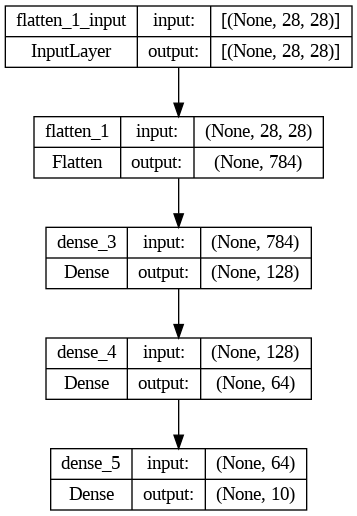

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model, show_shapes=True)

Compiling the model

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



Fitting the model

In [ ]:
history = model.fit(train_data, train_labels,epochs = 10 , validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2299 - accuracy: 0.9135 - val_loss: 0.3379 - val_accuracy: 0.8811
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2199 - accuracy: 0.9155 - val_loss: 0.3885 - val_accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2132 - accuracy: 0.9195 - val_loss: 0.3502 - val_accuracy: 0.8821
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2075 - accuracy: 0.9221 - val_loss: 0.3669 - val_accuracy: 0.8806
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2006 - accuracy: 0.9243 - val_loss: 0.3523 - val_accuracy: 0.8817
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1942 - accuracy: 0.9264 - val_loss: 0.3791 - val_accuracy: 0.8680
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1897 - accuracy: 0.9280 - val_loss: 0.3732 - val_accuracy

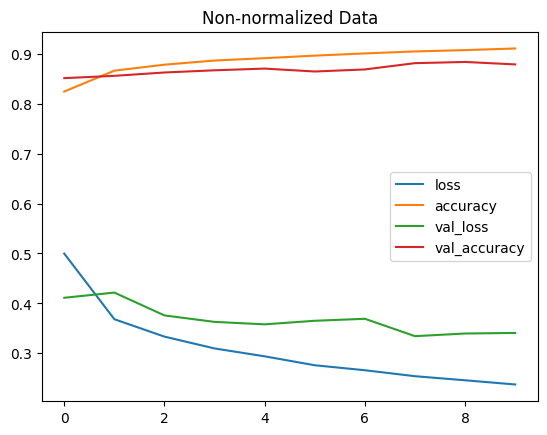

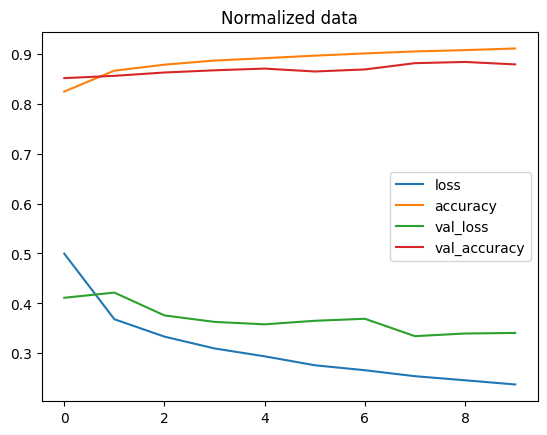

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Accuracy and loss graphs")

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_data)


313/313 [==============================] - 2s 4ms/step


In [ ]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


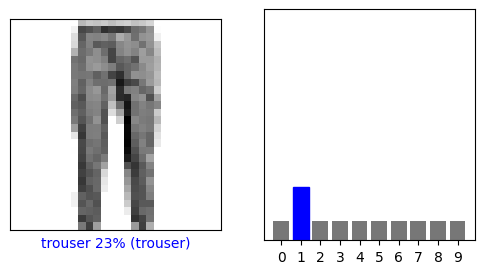

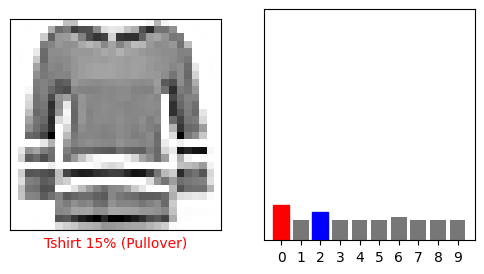

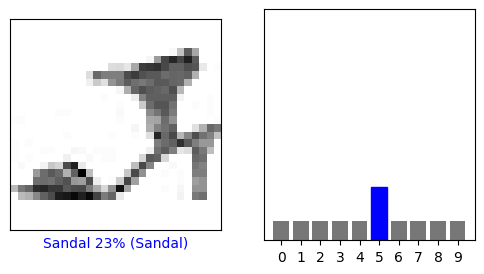

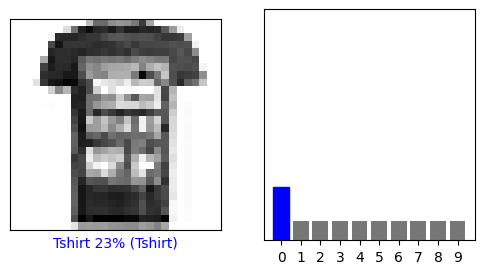

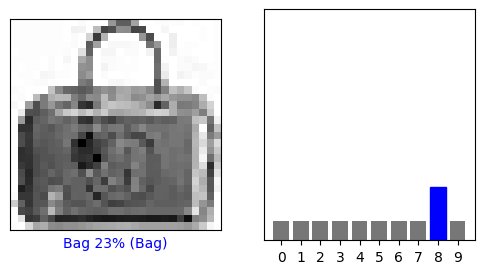

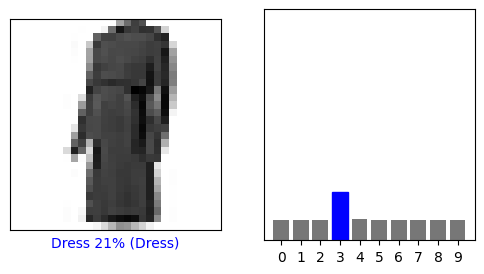

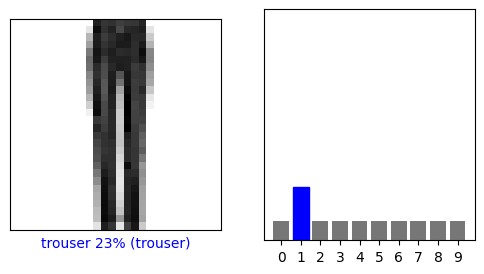

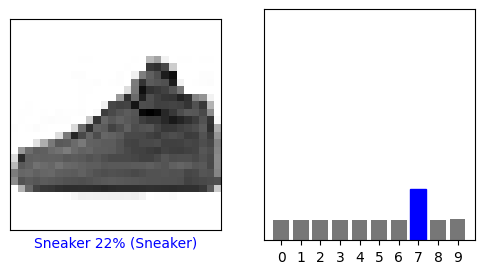

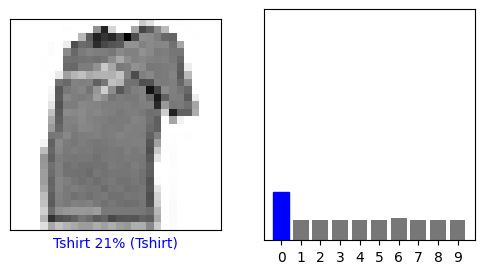

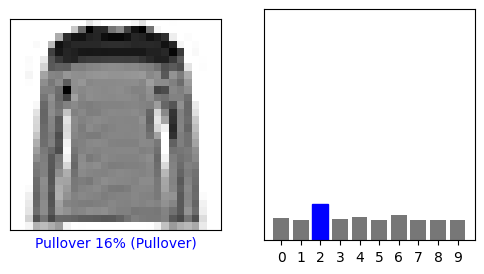

In [ ]:
for a in range (10):
  i = random.randint(1,10000)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  a+=1
